In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### Exercício Regressão

- Arquivo: exercicio-regressao.xls
- Bairro: 0 (Setubal) 1 (Boa Viagem)
- Ap (m2): Área Privativa
- PV: Pavimento
- SU: Suítes
- ID: Idade (anos)
- PC: Padrão de Construção 0 (Baixo) 1 (Normal) 2 (Alto)
- DP: Distância a Praia
- EV: 0 (Venda) 1 (Oferta)
- PT: Preço Total

In [20]:
dados = pd.read_excel('exercicio-regressao.xls')

In [21]:
dados.head()

,Ref,Bairro,AP (m2),PV,SU,ID (anos),PC,DP(hm),EV,PT (R$)
0,1,Boa Viagem,185,11,1,26,Normal,1,Oferta,550000
1,2,Boa Viagem,95,17,2,3,Alto,1,Oferta,550000
2,3,Boa Viagem,95,12,2,3,Alto,1,Oferta,530000
3,4,Boa Viagem,117,1,1,12,Alto,3,Venda,300000
4,5,Boa Viagem,80,10,1,10,Baixo,4,Oferta,260000


In [22]:
del dados['Ref']

In [23]:
dados['PU'] = dados['PT (R$)'] / dados['AP (m2)']

In [24]:
dados['PU']

0     2972.972973
1     5789.473684
2     5578.947368
3     2564.102564
4     3250.000000
5     1760.563380
6     3773.584906
7     3301.886792
8     4081.632653
9     4489.795918
10    2207.792208
11    2782.608696
12    2608.695652
13    4608.695652
14    4782.608696
15    4666.666667
16    5000.000000
17    3394.495413
18    3571.428571
19    4363.636364
20    3500.000000
21    2434.782609
22    5084.745763
23    3043.478261
24    3181.818182
25    3776.223776
26    3500.000000
27    4508.670520
Name: PU, dtype: float64

In [25]:
dados[dados['Bairro'] == 'Boa Viagem']

,Bairro,AP (m2),PV,SU,ID (anos),PC,DP(hm),EV,PT (R$),PU
0,Boa Viagem,185,11,1,26,Normal,1,Oferta,550000,2972.972973
1,Boa Viagem,95,17,2,3,Alto,1,Oferta,550000,5789.473684
2,Boa Viagem,95,12,2,3,Alto,1,Oferta,530000,5578.947368
3,Boa Viagem,117,1,1,12,Alto,3,Venda,300000,2564.102564
4,Boa Viagem,80,10,1,10,Baixo,4,Oferta,260000,3250.000000
5,Boa Viagem,284,6,2,25,Baixo,4,Oferta,500000,1760.563380
6,Boa Viagem,106,2,1,6,Normal,4,Oferta,400000,3773.584906
7,Boa Viagem,106,13,1,6,Normal,4,Oferta,350000,3301.886792
8,Boa Viagem,98,2,1,6,Normal,4,Oferta,400000,4081.632653
9,Boa Viagem,98,16,1,6,Normal,4,Oferta,440000,4489.795918


In [26]:
bairro = dados['Bairro']

In [27]:
bairro.str.contains('Boa')

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
Name: Bairro, dtype: bool

In [28]:
dados[dados['Bairro'].str.contains('Boa')]

,Bairro,AP (m2),PV,SU,ID (anos),PC,DP(hm),EV,PT (R$),PU
0,Boa Viagem,185,11,1,26,Normal,1,Oferta,550000,2972.972973
1,Boa Viagem,95,17,2,3,Alto,1,Oferta,550000,5789.473684
2,Boa Viagem,95,12,2,3,Alto,1,Oferta,530000,5578.947368
3,Boa Viagem,117,1,1,12,Alto,3,Venda,300000,2564.102564
4,Boa Viagem,80,10,1,10,Baixo,4,Oferta,260000,3250.000000
5,Boa Viagem,284,6,2,25,Baixo,4,Oferta,500000,1760.563380
6,Boa Viagem,106,2,1,6,Normal,4,Oferta,400000,3773.584906
7,Boa Viagem,106,13,1,6,Normal,4,Oferta,350000,3301.886792
8,Boa Viagem,98,2,1,6,Normal,4,Oferta,400000,4081.632653
9,Boa Viagem,98,16,1,6,Normal,4,Oferta,440000,4489.795918


In [29]:
def ajustar_padrao(v):
    if v == 'Alto':
        return 2
    elif v == 'Normal':
        return 1
    else:
        return 0

In [30]:
dados['PC'] = dados['PC'].apply(ajustar_padrao)

In [31]:
dados.head()

,Bairro,AP (m2),PV,SU,ID (anos),PC,DP(hm),EV,PT (R$),PU
0,Boa Viagem,185,11,1,26,1,1,Oferta,550000,2972.972973
1,Boa Viagem,95,17,2,3,2,1,Oferta,550000,5789.473684
2,Boa Viagem,95,12,2,3,2,1,Oferta,530000,5578.947368
3,Boa Viagem,117,1,1,12,2,3,Venda,300000,2564.102564
4,Boa Viagem,80,10,1,10,0,4,Oferta,260000,3250.000000


In [32]:
dados['Bairro'] = dados['Bairro'].apply(
    lambda b: (b == 'Boa Viagem' and 1) or 0
)

In [33]:
dados.head()

,Bairro,AP (m2),PV,SU,ID (anos),PC,DP(hm),EV,PT (R$),PU
0,1,185,11,1,26,1,1,Oferta,550000,2972.972973
1,1,95,17,2,3,2,1,Oferta,550000,5789.473684
2,1,95,12,2,3,2,1,Oferta,530000,5578.947368
3,1,117,1,1,12,2,3,Venda,300000,2564.102564
4,1,80,10,1,10,0,4,Oferta,260000,3250.000000


In [34]:
dados['EV'] = dados['EV'].apply(
    lambda e: {'Oferta': 1, 'Venda': 0}[e]
)

In [35]:
dados.head()

,Bairro,AP (m2),PV,SU,ID (anos),PC,DP(hm),EV,PT (R$),PU
0,1,185,11,1,26,1,1,1,550000,2972.972973
1,1,95,17,2,3,2,1,1,550000,5789.473684
2,1,95,12,2,3,2,1,1,530000,5578.947368
3,1,117,1,1,12,2,3,0,300000,2564.102564
4,1,80,10,1,10,0,4,1,260000,3250.000000


In [36]:
X = dados[
    ['Bairro', 'AP (m2)', 'PV', 'SU', 'ID (anos)', 'PC', 'DP(hm)', 'EV']
]

In [37]:
X = sm.add_constant(X)

In [38]:
Y = dados['PU']

In [39]:
model = sm.OLS(Y, X)

In [40]:
results = model.fit()

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PU   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     23.49
Date:                Thu, 28 Sep 2017   Prob (F-statistic):           2.72e-08
Time:                        11:40:20   Log-Likelihood:                -200.19
No. Observations:                  28   AIC:                             418.4
Df Residuals:                      19   BIC:                             430.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3349.5618    709.915      4.718      0.000    1863.692    4835.432
Bairro       589.9545    175.741      3.357      0.003     222.125     957.784
AP (m2)       -7.6206      2.897     -2.630      0.016     -13.685      -1.557
PV            28.1429     14.701      1.914      0.071      -2.627      58.912
SU           442.4998    230.226      1.922      0.070     -39.369     924.369
ID (anos)    -48.5169     24.641     -1.969      0.064    -100.092       3.058
PC           308.3834    184.837      1.668      0.112     -78.484     695.251
DP(hm)      -191.5124     84.176     -2.275      0.035    -367.695     -15.330
EV           685.4603    364.380      1.881      0.075     -77.197    1448.117
==============================================================================
Omnibus:                        0.293   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.276
Skew:                           0.205   Prob(JB):                        0.871
Kurtosis:                       2.738   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
Y = dados['PT (R$)']

In [43]:
model = sm.OLS(Y, X)

In [44]:
results = model.fit()

In [45]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PT (R$)   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     25.42
Date:                Thu, 28 Sep 2017   Prob (F-statistic):           1.40e-08
Time:                        11:41:40   Log-Likelihood:                -339.23
No. Observations:                  28   AIC:                             696.5
Df Residuals:                      19   BIC:                             708.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.01e+05   1.02e+05      0.993      0.333   -1.12e+05    3.14e+05
Bairro      3.152e+04   2.52e+04      1.251      0.226   -2.12e+04    8.43e+04
AP (m2)     1416.2508    415.411      3.409      0.003     546.786    2285.716
PV          2078.3075   2107.881      0.986      0.337   -2333.538    6490.153
SU          8.977e+04    3.3e+04      2.720      0.014    2.07e+04    1.59e+05
ID (anos)  -4561.1653   3533.163     -1.291      0.212    -1.2e+04    2833.831
PC          3.597e+04   2.65e+04      1.357      0.191   -1.95e+04    9.14e+04
DP(hm)     -2.449e+04   1.21e+04     -2.029      0.057   -4.97e+04     775.771
EV           6.76e+04   5.22e+04      1.294      0.211   -4.18e+04    1.77e+05
==============================================================================
Omnibus:                        3.241   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                2.117
Skew:                           0.664   Prob(JB):                        0.347
Kurtosis:                       3.223   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
import math
Y = Y.apply(math.log)

In [47]:
model = sm.OLS(Y, X)
results = model.fit()

In [48]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PT (R$)   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     23.98
Date:                Thu, 28 Sep 2017   Prob (F-statistic):           2.29e-08
Time:                        11:43:23   Log-Likelihood:                 26.059
No. Observations:                  28   AIC:                            -34.12
Df Residuals:                      19   BIC:                            -22.13
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1477      0.220     55.276      0.000      11.688      12.608
Bairro         0.1119      0.054      2.057      0.054      -0.002       0.226
AP (m2)        0.0035      0.001      3.885      0.001       0.002       0.005
PV             0.0034      0.005      0.757      0.458      -0.006       0.013
SU             0.1269      0.071      1.780      0.091      -0.022       0.276
ID (anos)     -0.0115      0.008     -1.502      0.150      -0.027       0.005
PC             0.1200      0.057      2.096      0.050       0.000       0.240
DP(hm)        -0.0552      0.026     -2.120      0.047      -0.110      -0.001
EV             0.2081      0.113      1.845      0.081      -0.028       0.444
==============================================================================
Omnibus:                        1.082   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                1.032
Skew:                           0.408   Prob(JB):                        0.597
Kurtosis:                       2.534   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

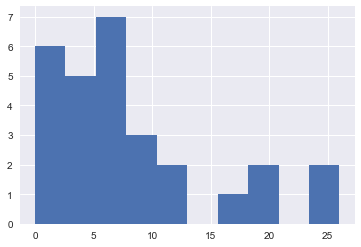

In [50]:
dados['ID (anos)'].hist()